In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import pandas_profiling
warnings.filterwarnings('ignore')

# Problem Statement

## Create a model for diagnosing Plantar Fasciitis

In [2]:
import os
os.listdir()

['.ipynb_checkpoints',
 'dataset.csv',
 'Plantar Fasciitis _ Kaggle.html',
 'Plantar Fasciitis _ Kaggle_files',
 'Plantar Fasciitis.ipynb']

In [3]:
df = pd.read_csv('dataset.csv')

In [4]:
df.head(8)

,id,age,sex,weight,hoursRunInAWeek,highHealWear,multipleJointPains,allignmentOfMidFoot,diabetes,cyanosis,burningSensationInPS,Tenderness,Status
0,1,21,0,55,7,0,0,0,0,0,0,0,0
1,2,14,0,57,7,0,0,0,0,0,0,1,0
2,3,21,0,51,12,0,0,0,0,0,1,0,0
3,4,23,0,42,8,0,0,0,0,0,1,1,0
4,5,12,0,62,9,0,0,0,0,1,0,0,0
5,6,12,0,50,10,0,0,0,0,1,0,1,0
6,7,10,0,40,6,0,0,0,0,1,1,0,0
7,8,15,0,63,12,0,0,0,0,1,1,1,0


In [8]:
df.shape

(384, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   id                    384 non-null    int64
 1   age                   384 non-null    int64
 2   sex                   384 non-null    int64
 3   weight                384 non-null    int64
 4   hoursRunInAWeek       384 non-null    int64
 5   highHealWear          384 non-null    int64
 6   multipleJointPains    384 non-null    int64
 7   allignmentOfMidFoot   384 non-null    int64
 8   diabetes              384 non-null    int64
 9   cyanosis              384 non-null    int64
 10  burningSensationInPS  384 non-null    int64
 11  Tenderness            384 non-null    int64
 12  Status                384 non-null    int64
dtypes: int64(13)
memory usage: 39.1 KB


In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,384.0,192.500000,110.995495,1.0,96.75,192.5,288.25,384.0
age,384.0,39.723958,14.770900,10.0,27.25,43.5,51.00,60.0
sex,384.0,0.500000,0.500652,0.0,0.00,0.5,1.00,1.0
weight,384.0,62.854167,10.711970,40.0,54.00,63.0,70.00,85.0
hoursRunInAWeek,384.0,2.000000,2.167888,0.0,1.00,2.0,3.00,12.0
highHealWear,384.0,0.500000,0.500652,0.0,0.00,0.5,1.00,1.0
multipleJointPains,384.0,0.500000,0.500652,0.0,0.00,0.5,1.00,1.0
allignmentOfMidFoot,384.0,1.000000,0.817562,0.0,0.00,1.0,2.00,2.0
diabetes,384.0,0.500000,0.500652,0.0,0.00,0.5,1.00,1.0
cyanosis,384.0,0.500000,0.500652,0.0,0.00,0.5,1.00,1.0


## Feature Engineering

### Checking for null values

In [11]:
df.isnull().sum()

id                      0
age                     0
sex                     0
weight                  0
hoursRunInAWeek         0
highHealWear            0
multipleJointPains      0
allignmentOfMidFoot     0
diabetes                0
cyanosis                0
burningSensationInPS    0
Tenderness              0
Status                  0
dtype: int64

#### No null values to handle

### Checking whether the target class is balanced or not

In [9]:
df["Status"].value_counts()

0    279
1    105
Name: Status, dtype: int64

[Text(0, 0, 'Alive'), Text(0, 0, 'Dead')]

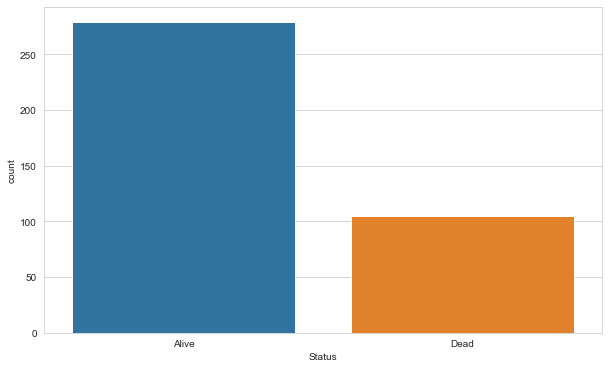

In [10]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
plot=sns.countplot(x="Status",data=df)
plot.set_xticklabels(["Alive","Dead"])

#### Seems to be less balanced, going ahead with Over Sampling Technique

### Over Sampling

In [12]:
columns = df.columns.tolist()
columns

['id',
 'age',
 'sex',
 'weight',
 'hoursRunInAWeek',
 'highHealWear',
 'multipleJointPains',
 'allignmentOfMidFoot',
 'diabetes',
 'cyanosis',
 'burningSensationInPS',
 'Tenderness',
 'Status']

In [13]:
X = df[['id',
 'age',
 'sex',
 'weight',
 'hoursRunInAWeek',
 'highHealWear',
 'multipleJointPains',
 'allignmentOfMidFoot',
 'diabetes',
 'cyanosis',
 'burningSensationInPS',
 'Tenderness',]]
Y = df['Status']

In [14]:
print(X.shape)
print(Y.shape)

(384, 12)
(384,)


In [15]:
## RandomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [16]:
os =RandomOverSampler(sampling_strategy=0.5)

In [17]:
X_train_res, y_train_res = os.fit_resample(X, Y)

In [18]:
X_train_res.shape,y_train_res.shape

((418, 12), (418,))

In [19]:
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({0: 279, 1: 105})
Resampled dataset shape Counter({0: 279, 1: 139})


In [20]:
df=X_train_res
df['Status']=y_train_res

[Text(0, 0, 'Alive'), Text(0, 0, 'Dead')]

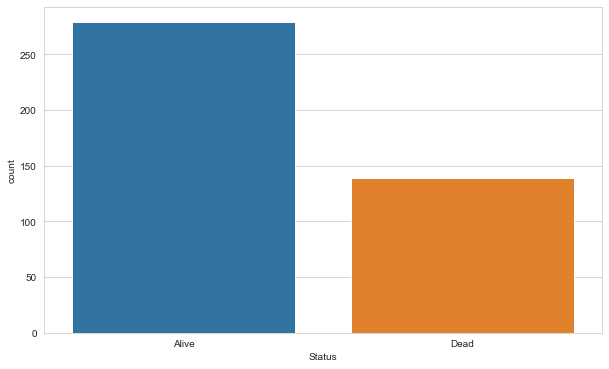

In [21]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
plot=sns.countplot(x="Status",data=df)
plot.set_xticklabels(["Alive","Dead"])

In [22]:
df.head()

,id,age,sex,weight,hoursRunInAWeek,highHealWear,multipleJointPains,allignmentOfMidFoot,diabetes,cyanosis,burningSensationInPS,Tenderness,Status
0,1,21,0,55,7,0,0,0,0,0,0,0,0
1,2,14,0,57,7,0,0,0,0,0,0,1,0
2,3,21,0,51,12,0,0,0,0,0,1,0,0
3,4,23,0,42,8,0,0,0,0,0,1,1,0
4,5,12,0,62,9,0,0,0,0,1,0,0,0


## Performing EDA using Panda Profiling

In [21]:
prof_report = pandas_profiling.ProfileReport(df , title = 'Plantar Fasciitis Prediction')
prof_report.to_widgets()

## Feature Selection

#### Using Heatmap

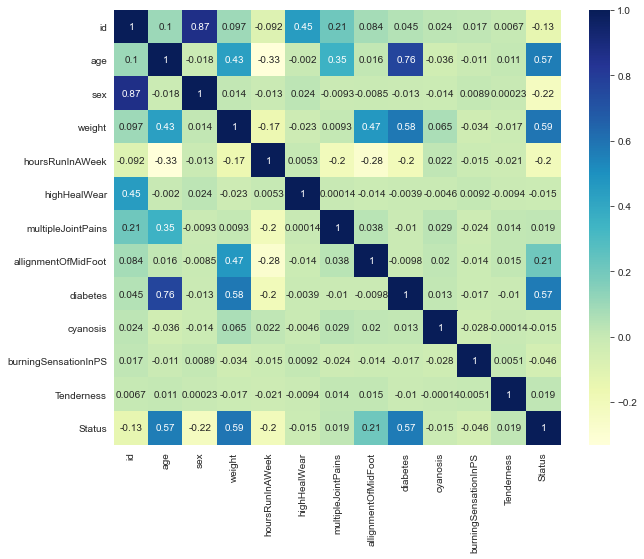

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

#### Using Filter method ( X-Square technique) on the attributes

In [26]:
df.columns

Index(['id', 'age', 'sex', 'weight', 'hoursRunInAWeek', 'highHealWear',
       'multipleJointPains', 'allignmentOfMidFoot', 'diabetes', 'cyanosis',
       'burningSensationInPS', 'Tenderness', 'Status'],
      dtype='object')

In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df[['sex','hoursRunInAWeek', 'highHealWear',
       'multipleJointPains', 'allignmentOfMidFoot', 'diabetes', 'cyanosis',
       'burningSensationInPS', 'Tenderness']]  #independent columns
y = df['Status']    #target column

In [24]:
#apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)

In [25]:
dfscores = pd.DataFrame(fit.scores_)
dfpvalues=pd.DataFrame(fit.pvalues_)
dfcolumns = pd.DataFrame(X.columns)

In [26]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores,dfpvalues],axis=1)
featureScores.columns = ['Specs','Score',"P-Values"]  #naming the dataframe columns

In [27]:
featureScores

,Specs,Score,P-Values
0,sex,10.531788,1.173387e-03
1,hoursRunInAWeek,41.322305,1.290874e-10
2,highHealWear,0.005389,9.414787e-01
3,multipleJointPains,0.005389,9.414787e-01
4,allignmentOfMidFoot,13.020346,3.081249e-04
5,diabetes,69.035449,9.670945e-17
6,cyanosis,0.508796,4.756607e-01
7,burningSensationInPS,0.014885,9.028957e-01
8,Tenderness,0.133079,7.152611e-01


In [28]:
x=df[["age","weight",'sex','hoursRunInAWeek','allignmentOfMidFoot', 'diabetes']]

In [29]:
y=df["Status"]

## Model Selection

Here we will be experimenting with 3 algorithms 
1. KNeighborsClassifier
2. DecisionTreeClassifier
3. RandomForestClassifier
4. XG Boost Classifier
5. SVM Classifier
6. Logistic Regression
7. Artificial Neural Network

### K Neighbors Classifier

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state =101)

In [41]:
standardScaler = StandardScaler()

x_train[["age","weight",'hoursRunInAWeek']] = standardScaler.fit_transform(x_train[["age","weight",'hoursRunInAWeek']])

x_test[["age","weight",'hoursRunInAWeek']]= standardScaler.transform(x_test[["age","weight",'hoursRunInAWeek']])

In [45]:
knn_scores = []
for k in range(1,30):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,x_train,y_train,cv=10)
    knn_scores.append(score.mean())

In [46]:
knn_scores

[0.9169354838709678,
 0.8590725806451612,
 0.865524193548387,
 0.8591733870967742,
 0.8559475806451614,
 0.8493951612903226,
 0.8621975806451614,
 0.8686491935483872,
 0.8492943548387096,
 0.8686491935483872,
 0.8556451612903226,
 0.875,
 0.8589717741935484,
 0.8462701612903226,
 0.8556451612903226,
 0.8494959677419354,
 0.8462701612903226,
 0.8494959677419354,
 0.8430443548387097,
 0.8367943548387096,
 0.8432459677419354,
 0.8431451612903226,
 0.8399193548387096,
 0.833366935483871,
 0.8428427419354838,
 0.833266129032258,
 0.836491935483871,
 0.833266129032258,
 0.833266129032258]

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

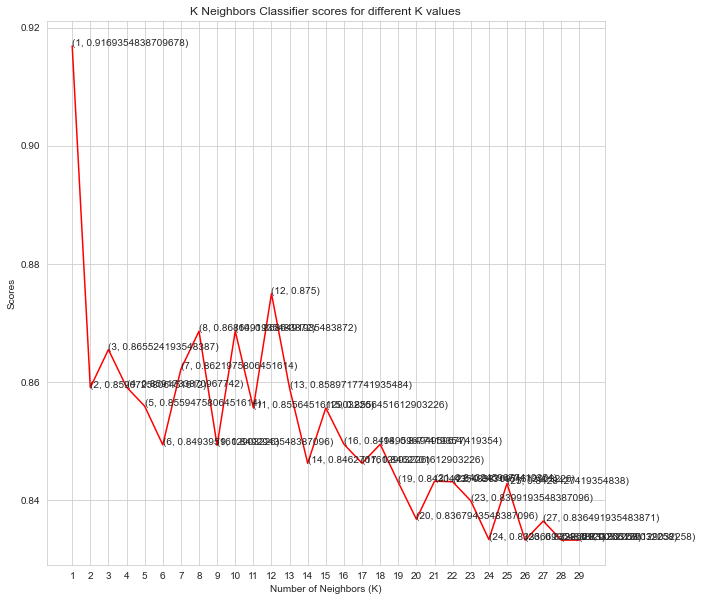

In [47]:
plt.figure(figsize=(10,10))
plt.plot([k for k in range(1, 30)], knn_scores, color = 'red')
for i in range(1,30):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 30)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [48]:
error_rate = []

# Will take some time
for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

In [49]:
error_rate

[0.047619047619047616,
 0.047619047619047616,
 0.047619047619047616,
 0.0380952380952381,
 0.0380952380952381,
 0.05714285714285714,
 0.05714285714285714,
 0.06666666666666667,
 0.0761904761904762,
 0.05714285714285714,
 0.06666666666666667,
 0.06666666666666667,
 0.0761904761904762,
 0.08571428571428572,
 0.08571428571428572,
 0.06666666666666667,
 0.08571428571428572,
 0.0761904761904762,
 0.0761904761904762,
 0.05714285714285714,
 0.05714285714285714,
 0.06666666666666667,
 0.0761904761904762,
 0.0761904761904762,
 0.08571428571428572,
 0.08571428571428572,
 0.08571428571428572,
 0.0761904761904762,
 0.08571428571428572]

Text(0.5, 1.0, 'Error rate for different K values')

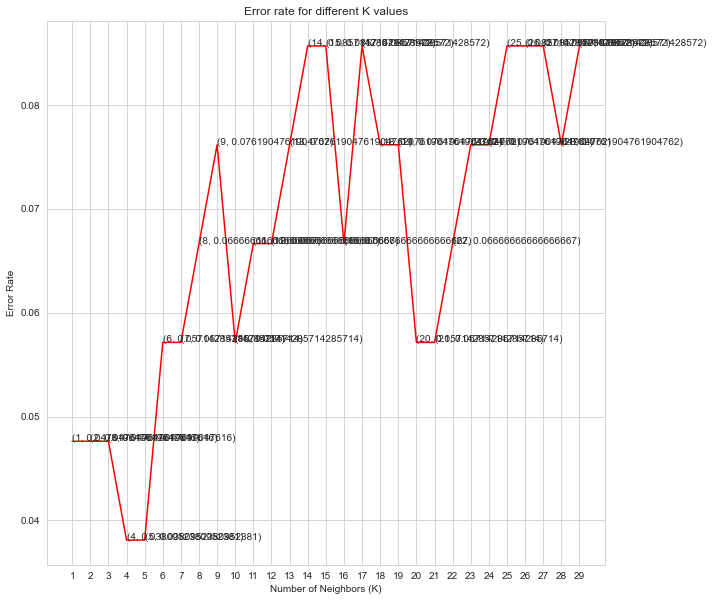

In [50]:
plt.figure(figsize=(10,10))
plt.plot([k for k in range(1, 30)],error_rate, color = 'red')
for i in range(1,30):
    plt.text(i, error_rate[i-1], (i, error_rate[i-1]))
plt.xticks([i for i in range(1, 30)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Error Rate')
plt.title('Error rate for different K values')

#### k=4 could be an ideal choice as it gives less error rate and more accuracy

In [51]:
knnclassifier = KNeighborsClassifier(n_neighbors=4)
knnclassifier.fit(x_train,y_train)
y_pred = knnclassifier.predict(x_test)
metrics.accuracy_score(y_test,y_pred)

0.9619047619047619

In [52]:
print(confusion_matrix(y_test,y_pred))

[[74  1]
 [ 3 27]]


In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        75
           1       0.96      0.90      0.93        30

    accuracy                           0.96       105
   macro avg       0.96      0.94      0.95       105
weighted avg       0.96      0.96      0.96       105



### Decision Tree

In [318]:
from sklearn.tree import DecisionTreeClassifier

In [319]:
#No need for standardization for this algorithm
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=101)

clf = DecisionTreeClassifier(random_state=101)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=101)

In [320]:
pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.7236842105263158

In [321]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [322]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.1846722068328716


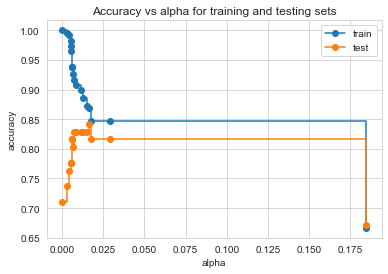

In [323]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [324]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.025)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.025, random_state=0)

In [325]:
pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8157894736842105

In [326]:
print(confusion_matrix(y_test,pred))

[[48  3]
 [11 14]]


In [316]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87        51
           1       0.82      0.56      0.67        25

    accuracy                           0.82        76
   macro avg       0.82      0.75      0.77        76
weighted avg       0.82      0.82      0.80        76



### RandomForestClassifier

In [327]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=101)

In [334]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

est = RandomForestClassifier(n_jobs=-1)     #Utilizes all the cores of the CPU
rf_p_dist={'max_depth':[3,5,10,None],    #None means till full depth
              'n_estimators':[10,100,200,300,400,500],   # Number of Decision Trees
              'max_features':randint(1,11),   # AS I have 10 features
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf':randint(1,4),
              }

In [335]:
def hypertuning_rscv(est, p_distr, nbr_iter,X,y):   #p_distr is the different set of parameters
    rdmsearch = RandomizedSearchCV(est, param_distributions=p_distr,
                                  n_jobs=-1, n_iter=nbr_iter, cv=5)
    rdmsearch.fit(X,y)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score

In [336]:
rf_parameters, rf_ht_score = hypertuning_rscv(est, rf_p_dist, 10, x, y)

In [337]:
rf_parameters

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': 2,
 'min_samples_leaf': 2,
 'n_estimators': 200}

In [338]:
rf_ht_score

0.7531693989071038

In [339]:
classifier=RandomForestClassifier(n_jobs=-1, n_estimators=200,bootstrap= True,criterion='gini',max_depth=3,max_features=2,min_samples_leaf= 2)

In [340]:
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_features=2, min_samples_leaf=2,
                       n_estimators=200, n_jobs=-1)

In [341]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)

accuracy_score=accuracy_score(y_test,y_pred)
print(cm)
print(accuracy_score)

[[49  2]
 [12 13]]
0.8157894736842105


In [342]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.96      0.88        51
           1       0.87      0.52      0.65        25

    accuracy                           0.82        76
   macro avg       0.83      0.74      0.76        76
weighted avg       0.82      0.82      0.80        76



### XG Boost

In [343]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [344]:
classifier=xgboost.XGBClassifier()

In [345]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [346]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [347]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=101)

In [348]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[14:34:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=No

In [349]:
classifier=xgboost.XGBClassifier(max_depth=3,subsample=1,n_estimators=100,learning_rate=0.2,min_child_weight=7, random_state=0,reg_alpha=0, reg_lambda=1)

In [350]:
classifier.fit(X_train, y_train)

[14:35:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [351]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)

accuracy_score=accuracy_score(y_test,y_pred)
print(cm)
print(accuracy_score)

[[48  3]
 [ 9 16]]
0.8421052631578947


In [352]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89        51
           1       0.84      0.64      0.73        25

    accuracy                           0.84        76
   macro avg       0.84      0.79      0.81        76
weighted avg       0.84      0.84      0.84        76



### Logisitic Regression

In [353]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [354]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.841147 using {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.824839 (0.073292) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.806057 (0.071049) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.834552 (0.062722) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.824839 (0.073764) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.809355 (0.069519) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.830287 (0.064517) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.832473 (0.073433) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.807097 (0.071892) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.832509 (0.061007) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.841147 (0.060168) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.807133 (0.066935) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.830251 (0.067288) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.832509 (0.048836) wit

In [383]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=101)

In [393]:
logisticRegr = LogisticRegression(C=10,penalty="l2",solver='newton-cg')

In [394]:
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=10, solver='newton-cg')

In [395]:
predictions = logisticRegr.predict(X_test)

In [396]:
cm=confusion_matrix(y_test, predictions)
print(cm)

[[44  7]
 [ 7 18]]


In [397]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        51
           1       0.72      0.72      0.72        25

    accuracy                           0.82        76
   macro avg       0.79      0.79      0.79        76
weighted avg       0.82      0.82      0.82        76



### SVM

In [55]:
from sklearn.svm import SVC
model = SVC()

In [56]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=101)

In [57]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [403]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.674 total time=   0.3s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.674 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.652 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.674 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.674 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.652 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.674 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.674 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.652 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.689 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.689 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.717 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.652 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.652 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.711 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.689 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.761 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.674 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.674 total time=   0.0s
[CV 4/5] END ...C=1000, gamm

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [60]:
model=SVC(C=1000,gamma=0.0001,kernel="rbf")

In [61]:
model.fit(X_train,y_train)

SVC(C=1000, gamma=0.0001)

In [62]:
predictions = model.predict(X_test)

In [63]:
print(confusion_matrix(y_test,predictions))

[[71  4]
 [ 2 28]]


In [64]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        75
           1       0.88      0.93      0.90        30

    accuracy                           0.94       105
   macro avg       0.92      0.94      0.93       105
weighted avg       0.94      0.94      0.94       105



## FINAL MODEL SELECTED- SVM MODEL

In [30]:
from sklearn.svm import SVC
model = SVC()

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=101,test_size=0.7)

NameError: name 'train_test_split' is not defined

In [74]:
X_train.shape

(125, 6)

In [75]:
X_test.shape

(293, 6)

In [76]:
model=SVC(C=1000,gamma=0.0001,kernel="rbf")
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[186  11]
 [  9  87]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       197
           1       0.89      0.91      0.90        96

    accuracy                           0.93       293
   macro avg       0.92      0.93      0.92       293
weighted avg       0.93      0.93      0.93       293

